<a href="https://colab.research.google.com/github/Jun-629/20MA573/blob/master/src/Hw6_BM1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

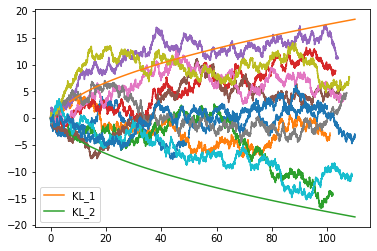

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math  

def exactbm(T,N):
  w_list = [0]                          # set a list with W_0 = 0
  h = T/N                               # set the step
  wi = 0
  for i in range(N):
    Z = np.random.normal(0,1)
    wi += np.sqrt(h) * Z
    w_list.append(wi)
  return w_list

def pltbm(T,N):
  x0 = [x*T/N for x in range(N+1)]
  y0 = exactbm(T,N)
  return plt.plot(x0,y0)

for t in range(100,111):
  pltbm(t,int(t/0.01));
  
a = list(range(int(math.e**2),111))
b = [math.sqrt(2*x*math.log(math.log(x))) for x in a] 
c = [-x for x in b]
plt.plot(a,b,label = 'KL_1');
plt.plot(a,c,label = 'KL_2');
plt.legend();

  - Prove that $\hat W$ is an exact sampling.

  __Pf:__

By the definition of $\hat W$, we know that $\hat W(t_{i+1}) - \hat W(t_{i})  = \sqrt{t_{i+1} - t_i} \cdot Z_{i+1}$, where $\{Z_i\}_{i=1}^N \overset{i.i.d}{\sim} \mathcal N(0,1)$, then by the property of Normal distribution, we will have 
$$\hat W(t_{i+1}) - \hat W(t_{i}) \sim \mathcal N(0,t_{i+1} - t_i),$$
plus, $\hat W(t_{i+1}) - \hat W(t_{i}), i = 1, 2, ..., N $ is independent of each other, which meets the definition of independent increments in Brownian Motion.

Thus we have $\hat W(t_{i}) \sim \mathcal N(0, t_i)$. Therefore $\hat W$ is an exact sampling.

__Q.E.D__

__Example 3__

Consider Arithmetic asian option price on BSM by exact sampling.
- Write a pseudocode for Arithmetic asian option price on BSM 
- To the Gbm class, add a method arasian(otype, strike, maturity, nstep, npath)
for the price by exact sampling. 
- Use your code to compute Arithmetic asian option of 
$$S_0 = 100.0, \sigma = 0.20, r = 0.0475, K = 110.0, T = 1.0, otype = 1, nstep = 5.$$

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as so
import scipy.stats as ss

'''=========
option class init
=========='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
'''============
Gbm class
============='''

class Gbm:
    def __init__(self, init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2,
                 nstep = 5,
                 N = 1000):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio
        self.nstep = nstep
        self.N = N                                      # The number of trials

    def arasian(self,Vanillaoption):
      s0 = self.init_state
      sigma = self.vol_ratio
      r = self.drift_ratio
      n = self.nstep
      N = self.N
        
      otype = Vanillaoption.otype
      k = Vanillaoption.strike
      T = Vanillaoption.maturity

      C_P = 0

      for i in range(N):
        t = np.linspace(0, T, n+1)                   # Generate an isometric time list 
        h = T/n
        W = np.zeros(n+1)
        for j in range(n):
          W[j+1] = W[j] + np.sqrt(h) * np.random.normal(0,1)   
        S = s0 * np.exp((r - sigma**2/2.) * t + sigma * W)  
        A_T = np.mean(S)
        C_P += np.exp(-r*T)*np.max([A_T-k, 0])
      return C_P/N

gbm1 = Gbm()
option1 = VanillaOption()
print('>>> The price of Arithmetic Asian call option is ')
gbm1.arasian(option1)

>>> The price of Arithmetic Asian call option is 


1.9468052789133352

In [0]:
#### draft

T = 1
n = 5
h = T/n
s0 = 100
r = 0.0475
sigma = 0.2
w_list = []
wi = 0
t = [h * x for x in range(n)]
for j in range(n):
  Z = np.random.normal(0,1)
  wi += np.sqrt(h) * Z
  w_list.append(wi)

type(w_list)
#w_list2 = w_list.tolist()
[(s0 * np.exp(r - sigma**2/2.) * t + sigma * xx) for xx in w_list]